In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
titanic_train = pd.read_csv('C:/Users/filip/ML/static/Titanick/train.csv')


In [4]:
X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived

In [5]:
X = pd.get_dummies(X) # разбиваем колонки на несколько
X = X.fillna({'Age': X.Age.median()}) # заполняем пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

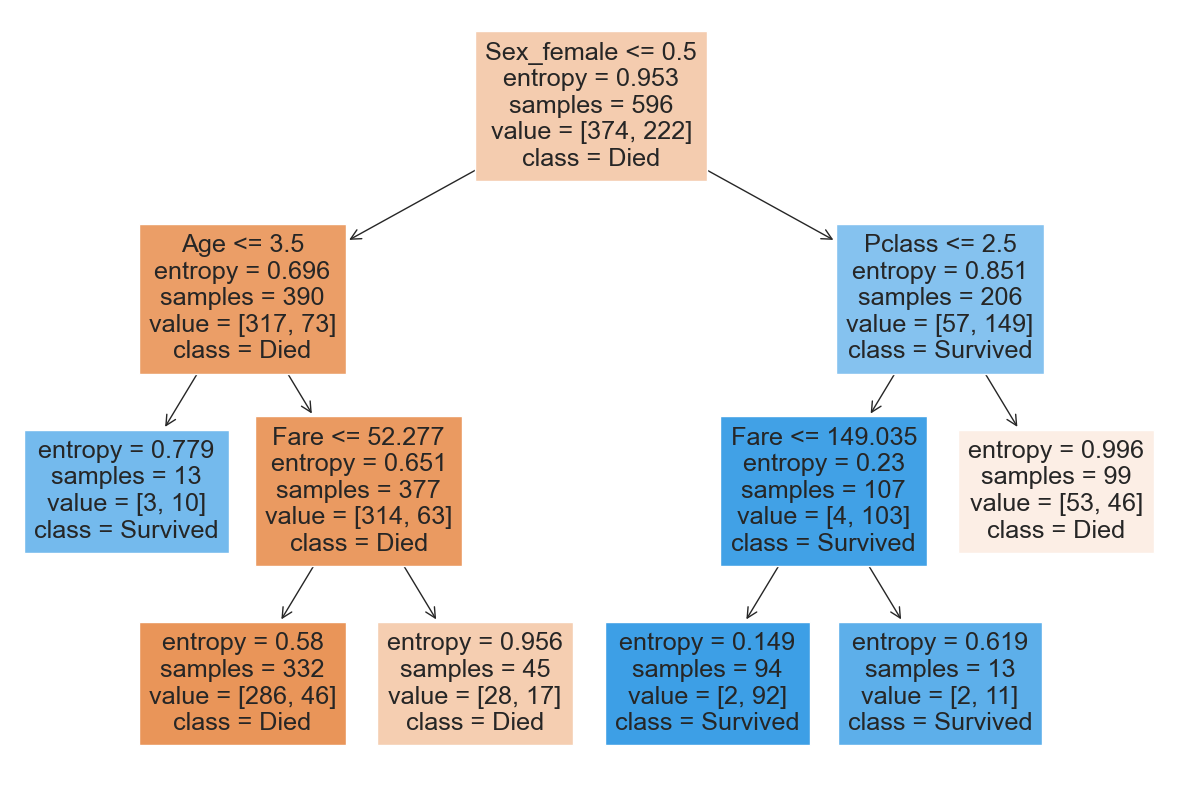

In [11]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
clf_rf = RandomForestClassifier()

In [20]:
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

In [21]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [23]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [ ]:
clf_rf.predict()